In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import matplotlib.ticker as mticker 

In [3]:
with open(r'D:\Projects\Tremor\BIN FILES\Errors for Calibration for Accurate attempt 5 (all) (corrected).pkl', 'rb') as file:
    res = pickle.load(file)

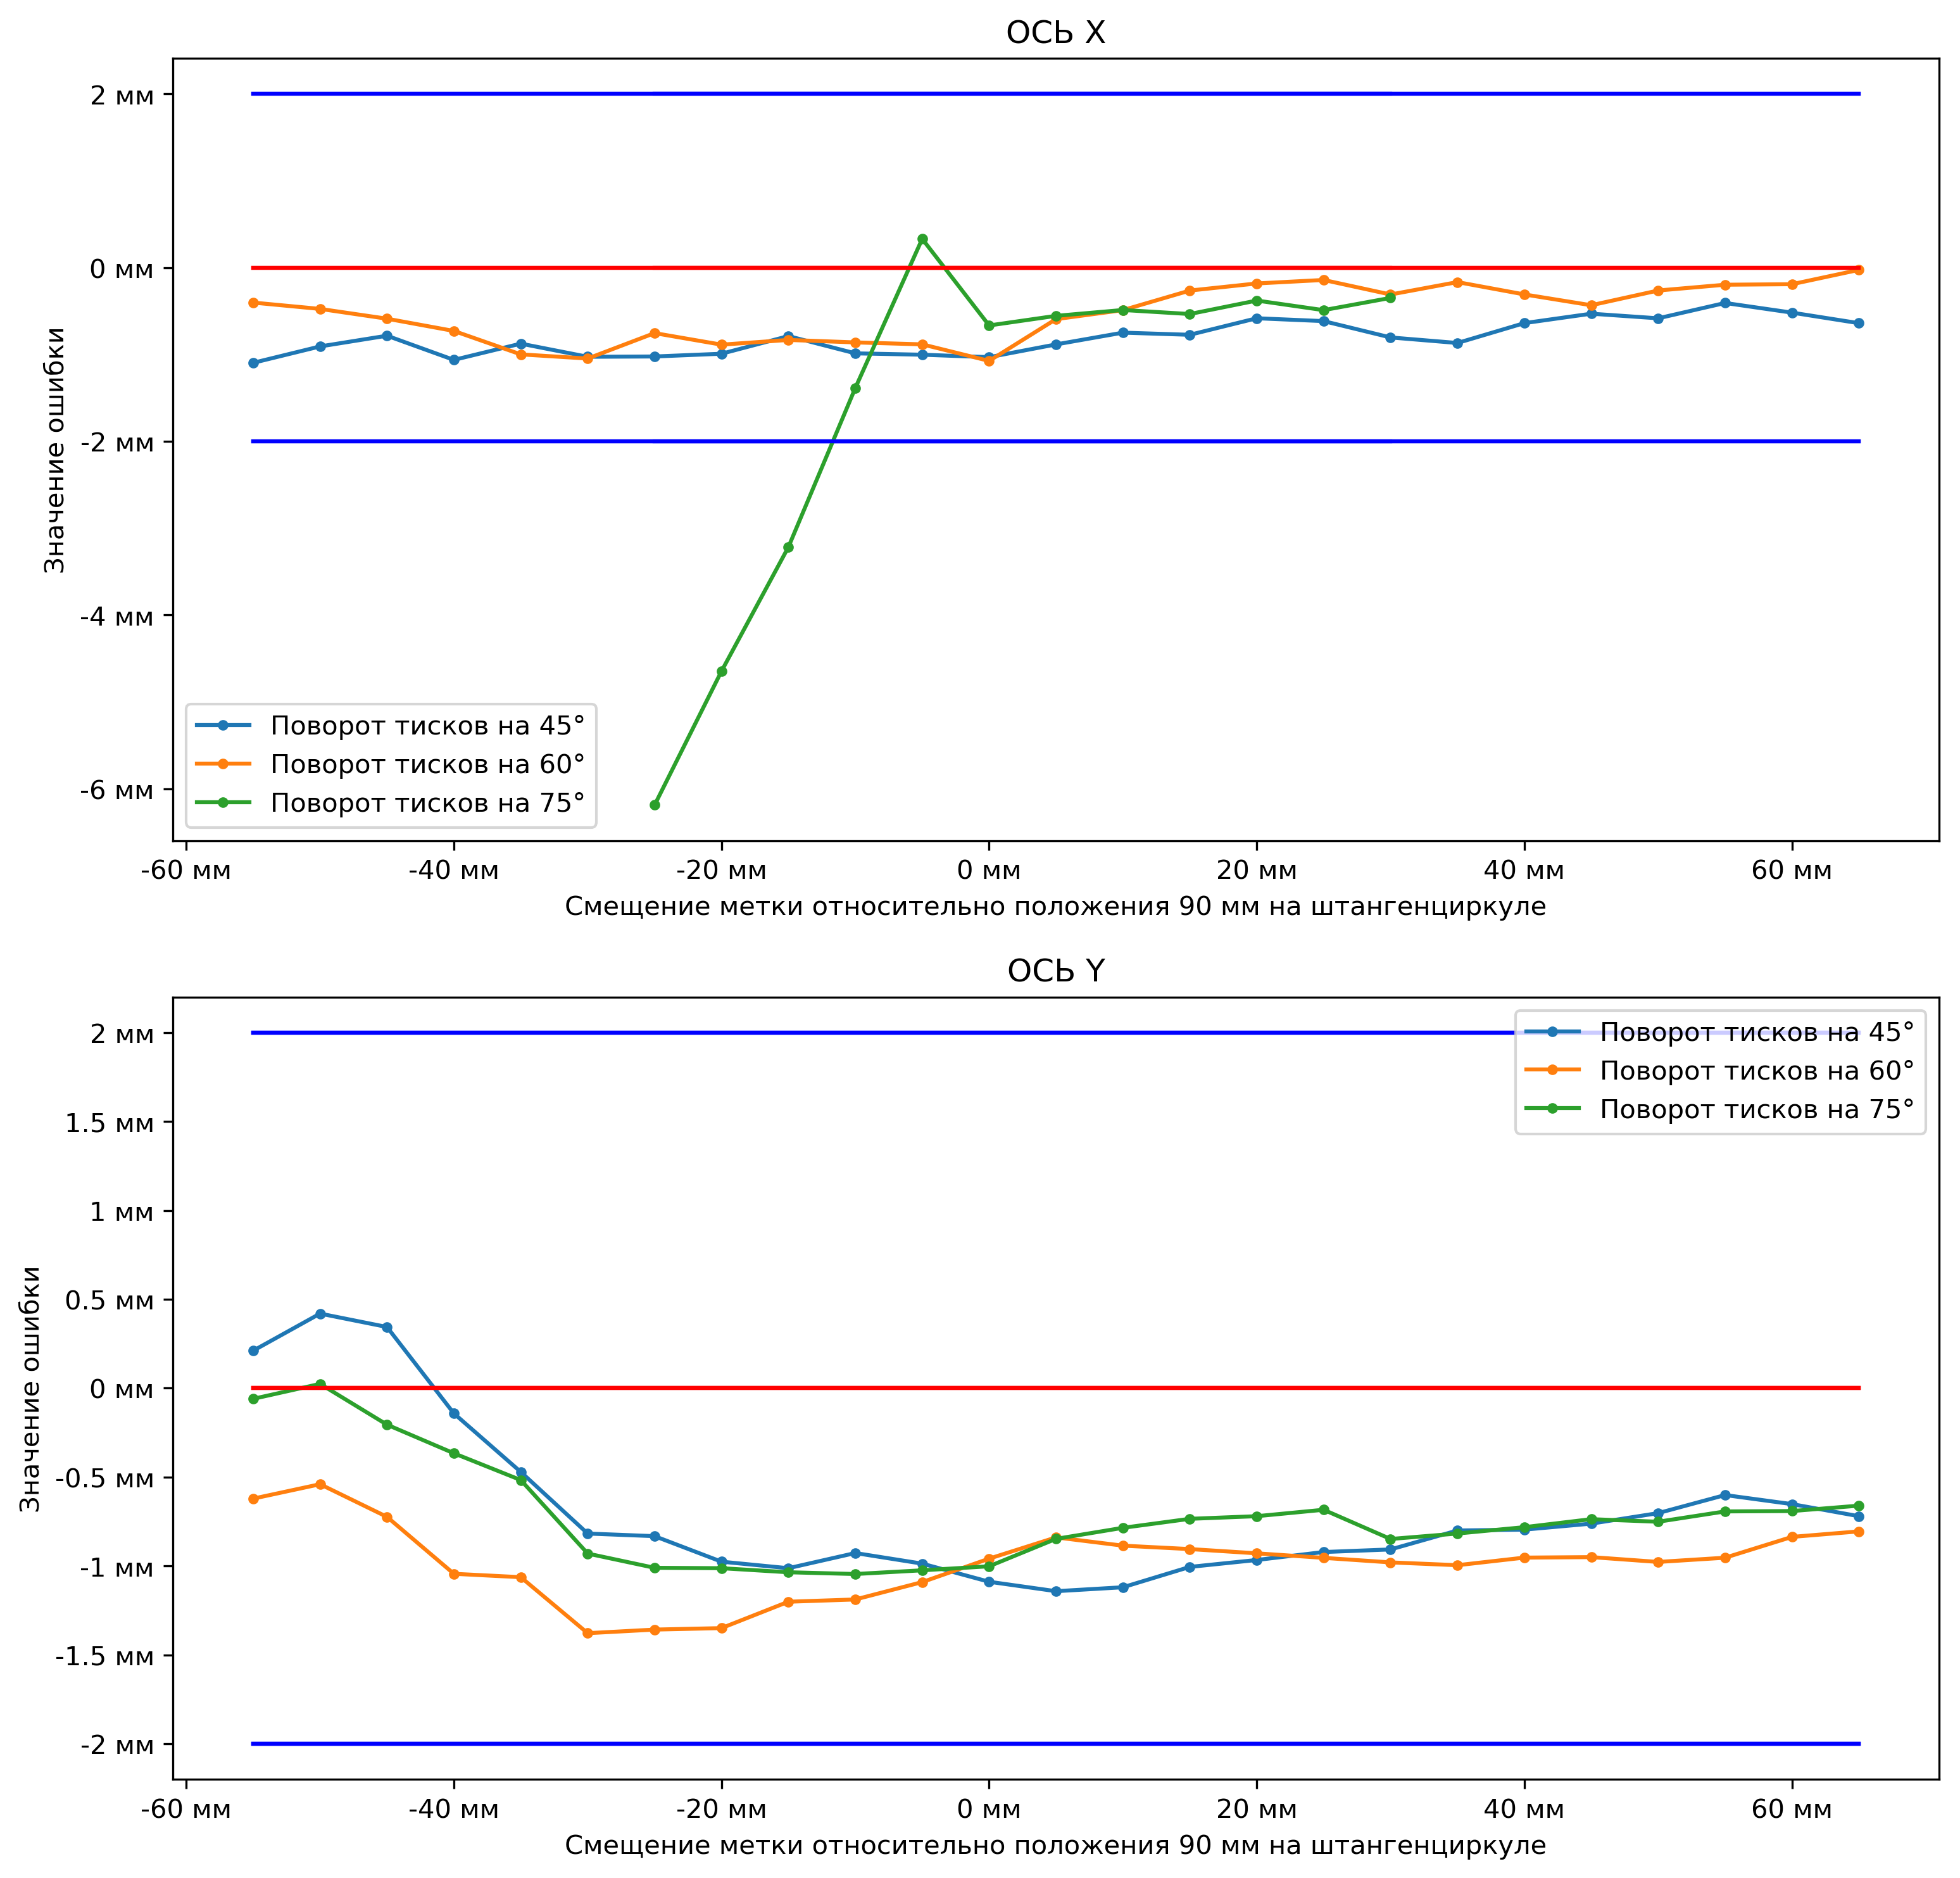

In [17]:
scale = 6
fig, axes = plt.subplots(2, dpi=300, figsize=(2*scale, 2*scale))
tests_per_axis = len(res)//2
legend = [[], []]
plots_for_legend = [[], []]
for col, (name, div) in enumerate(res.items()):
        if col%tests_per_axis < 3:
            continue
        str_inx, col_inx = col%tests_per_axis%3, col//tests_per_axis
        
        axes[col_inx].get_xaxis().set_major_formatter(mticker.FormatStrFormatter('%g мм'))
        axes[col_inx].get_yaxis().set_major_formatter(mticker.FormatStrFormatter('%g мм'))
        
        axis_name, angle = name.split('\\')[-1].split(' ')
        axes[col_inx].title.set_text(f'ОСЬ {axis_name}')
        axes[col_inx].set_xlabel('Смещение метки относительно положения 90 мм на штангенциркуле')
        axes[col_inx].set_ylabel('Значение ошибки')
        legend[col_inx] += [f'Поворот тисков на {angle}°']
        
        div2 = div - div[len(div)//2-1]
        div2 = [np.mean(div2[step:step+5]) for step in range(len(div2)//5)]
        #div2[np.abs(div2) > 10] = np.nan
        x_axis =  np.asarray([5*i for i in range(len(div)//5)]) #for repeat_num in range(5)
        x_axis -= x_axis[len(x_axis)//2-1]

        plot = axes[col_inx].plot(x_axis, div2, '.-')
        plots_for_legend[col_inx] += [plot[0]]
        axes[col_inx].plot(x_axis, [0] *len(div2), c='r' )
        axes[col_inx].plot(x_axis, [2] *len(div2), c='b' )
        axes[col_inx].plot(x_axis, [-2] *len(div2), c='b' )
        
for i in range(2):
    axes[i].legend(tuple(plots_for_legend[i]), legend[i])
        
fig.savefig(r'C:\Users\Ivan\OneDrive\Статья\Errors part 2.png', bbox_inches='tight')

TypeError: object of type 'numpy.float64' has no len()

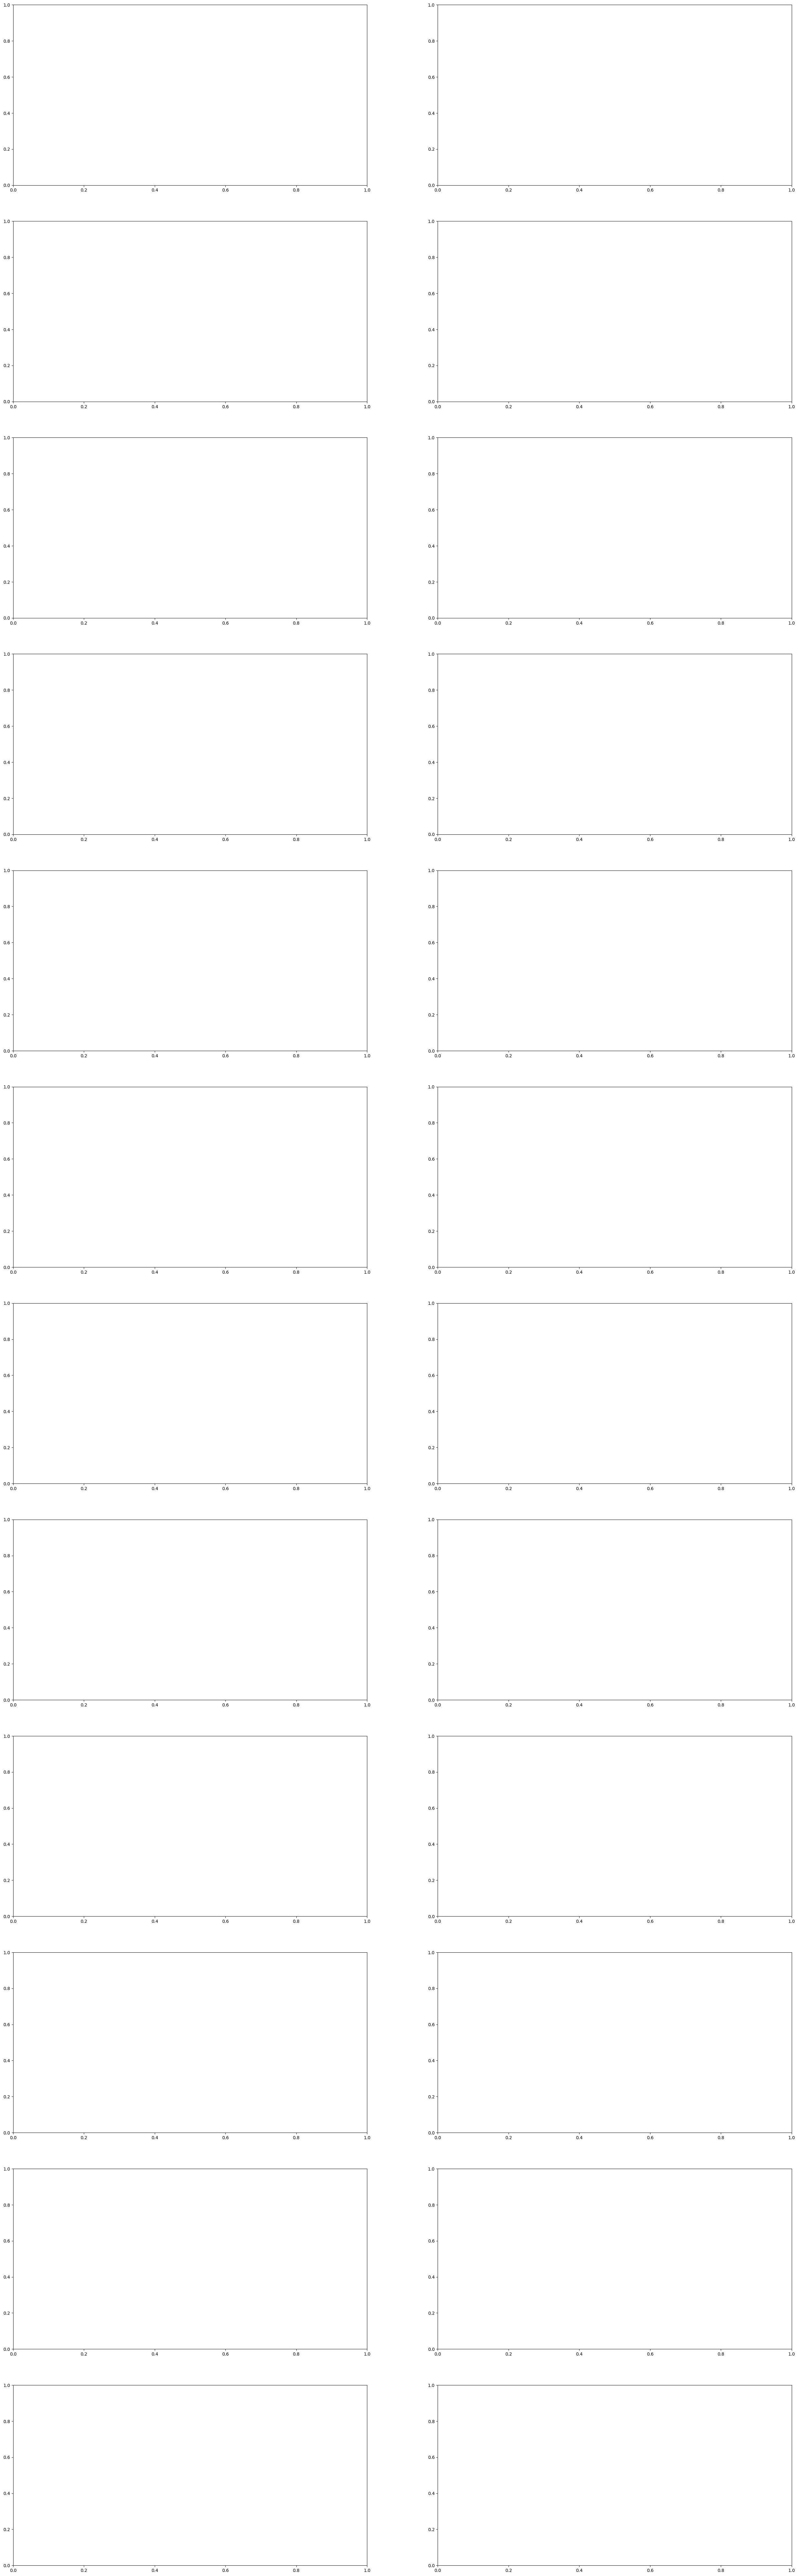

In [10]:
fig, axes = plt.subplots(len(res2), 2, dpi=100, figsize=(16*2, 9*len(res2)))
for res_num, res_arr in enumerate([res, res2]):
    for col, (name, div) in enumerate(res_arr.items()): #deviations_Z
            div2 = div[len(div)//2-1]
            axes[col][res_num].scatter(range(len(div2)), div2)
            axes[col][res_num].plot(range(len(div2)), [0] *len(div2), c='r' )
            axes[col][res_num].plot(range(len(div2)), [1] *len(div2), c='b' )
            axes[col][res_num].plot(range(len(div2)), [-1] *len(div2), c='b' )
            axes[col][res_num].title.set_text('File: %s' % (name))

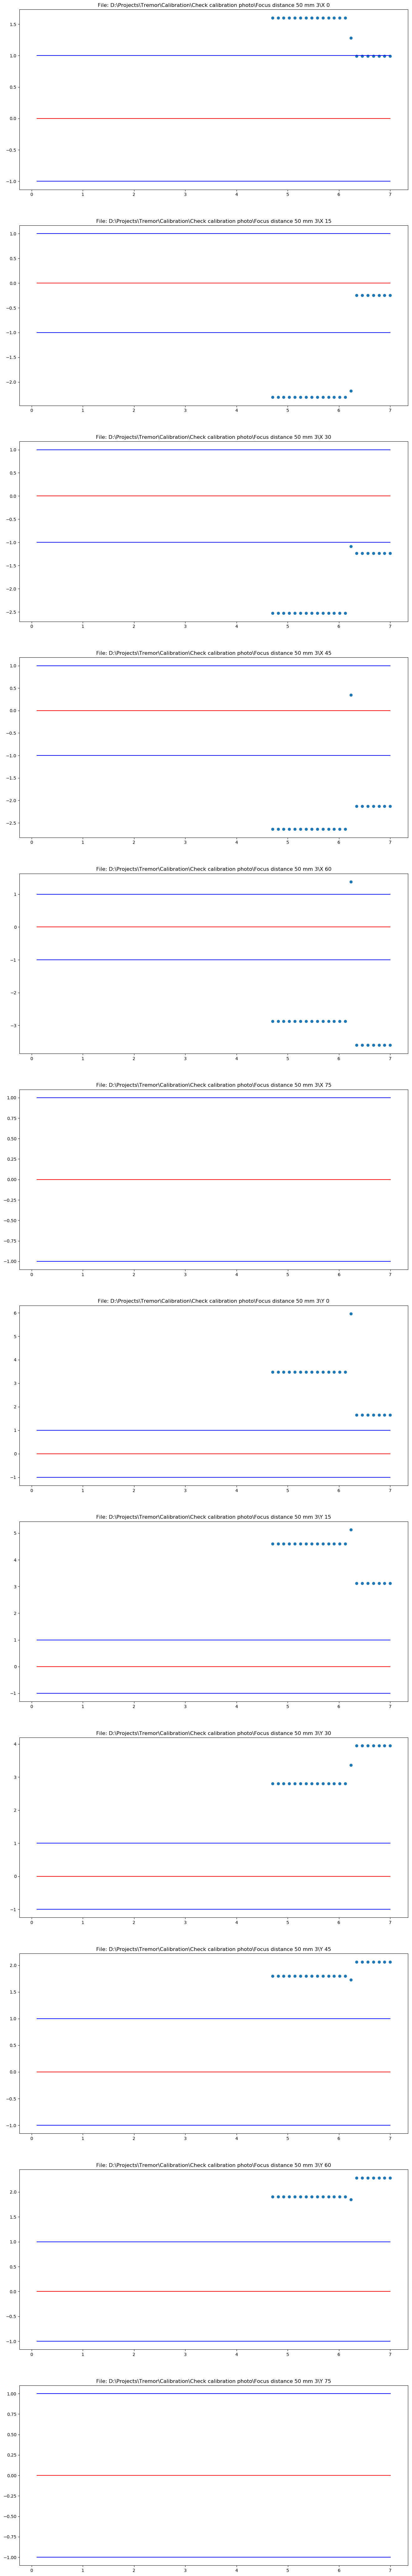

In [8]:
points = {folder:[] for folder in list(res.values())[0].keys()}
accuracy_list = []
for accuracy, test_with_accuracy in res.items():
    for test_num, (test_folder, test_res) in enumerate(test_with_accuracy.items()):
        #print(np.max(np.abs(test_res)))
        points[test_folder] += [np.mean(test_res)]
    accuracy_list += [accuracy]

num_of_tests = len(points)
fig, axes = plt.subplots(num_of_tests, dpi=100, figsize=(16, 9*num_of_tests))
for test_num, (folder, folder_points) in enumerate(points.items()):
    #div2 = div - div[len(div)//2-1]
    axes[test_num].scatter(accuracy_list, folder_points)
    axes[test_num].plot(accuracy_list, [0] *len(folder_points), c='r' )
    axes[test_num].plot(accuracy_list, [1] *len(folder_points), c='b' )
    axes[test_num].plot(accuracy_list, [-1] *len(folder_points), c='b' )
    axes[test_num].title.set_text('File: %s' % (folder))

In [35]:
errors_by_every_file_path = fr'D:\Projects\Tremor\BIN FILES\Errors for Accurate attempt 5 by every file (corrected).pkl'
with open((errors_by_every_file_path), 'rb') as file:
    errors = pickle.load(file)

all_files_to_calib = []
for allowable_error in np.arange(7, 0, -7 / 64):
    files_to_calib = []
    for file in errors:
        errors_for_file = np.asarray([np.mean(errors[file][folder]) for folder in errors[file]])
        is_allowable_error = np.abs(errors_for_file) < allowable_error
        if list(is_allowable_error).count(True) >= 4:
            files_to_calib += [file]
    all_files_to_calib.append(files_to_calib)

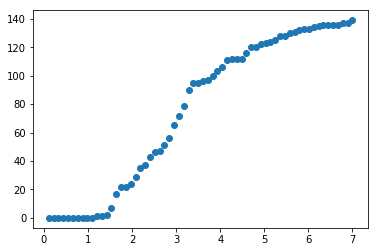

In [39]:
r = list(zip(np.arange(7, 0, -7 / 64), [len(sample) for sample in all_files_to_calib]))

plt.scatter(np.arange(7, 0, -7 / 64), [len(sample) for sample in all_files_to_calib])

In [5]:
[5*i for i in range(len(res)//5) for repeat_num in range(5)]

[0, 0, 0, 0, 0, 5, 5, 5, 5, 5]

In [38]:
print(axes[0].set_xlabel)

<bound method Axes.set_xlabel of <matplotlib.axes._subplots.AxesSubplot object at 0x000001195E50FE10>>
